In [124]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [189]:
# 한글 폰트 깨짐을 위해 

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf').get_name()
plt.rc('font', family = font_name)

# -(음수) 깨짐을 위해
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 그래츠 출력시 warning 제거 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('data.xlsx') # 7/27 이전 데이터는 해당 사이트에서 제공해주지 않아 수집 물가 

In [3]:
df.head()

,game_num,play_date,game_type,result,game_length,champion,spell_d,spell_f,level,creep_score,...,green_ward,del_ward,total_kill,total_gold,get_baron,get_dragon,get_tower,lose_baron,lose_dragon,lose_tower
0,5645119577,1640272200,솔랭,승리,22분 52초,라이즈,점멸,순간이동,13,140,...,4,1,39,50331,0,3,11,0,0,1
1,5644935356,1640269581,솔랭,승리,40분 51초,퀸,점멸,유체화,18,211,...,2,5,38,79208,2,2,9,1,4,10
2,5641110851,1640094201,솔랭,승리,22분 50초,라이즈,점멸,순간이동,13,132,...,5,0,20,40155,0,2,3,0,0,2
3,5641072072,1640092528,솔랭,승리,28분 38초,그웬,점멸,순간이동,15,209,...,3,1,43,61856,1,3,11,0,1,2
4,5624417917,1639407112,자유 5:5 랭크,패배,29분 2초,라이즈,점멸,순간이동,14,174,...,4,5,36,53526,0,2,3,1,2,8


In [4]:
df.info() # Null 값 없이 수집된 모습 확인, 데이터 컬럼별 데이터 형식 수정 필요해 보임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_num        475 non-null    int64  
 1   play_date       475 non-null    int64  
 2   game_type       475 non-null    object 
 3   result          475 non-null    object 
 4   game_length     475 non-null    object 
 5   champion        475 non-null    object 
 6   spell_d         475 non-null    object 
 7   spell_f         475 non-null    object 
 8   level           475 non-null    int64  
 9   creep_score     475 non-null    int64  
 10  cs_1m           475 non-null    float64
 11  kill            475 non-null    int64  
 12  death           475 non-null    int64  
 13  assist          475 non-null    int64  
 14  kda             475 non-null    float64
 15  kill_ratio      475 non-null    int64  
 16  average_tier    475 non-null    object 
 17  op_score        475 non-null    flo

In [5]:
for i in range(len(df)):  # play_date 컬럼 보기 쉽게 날짜 형식으로 변경 및 데이터 타입 datetime 변경
    df['play_date'][i] = str(datetime.datetime.fromtimestamp(df.play_date[i])).split(' ')[0]
    
df['play_date'] = df['play_date'].astype('datetime64')

<ipython-input-5-6dccd5b63d71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['play_date'][i] = str(datetime.datetime.fromtimestamp(df.play_date[i])).split(' ')[0]
/Users/myceleb_39/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [6]:
df.info() # play_date 컬럼이 object에서 dataetime으로 변경된 것 확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   game_num        475 non-null    int64         
 1   play_date       475 non-null    datetime64[ns]
 2   game_type       475 non-null    object        
 3   result          475 non-null    object        
 4   game_length     475 non-null    object        
 5   champion        475 non-null    object        
 6   spell_d         475 non-null    object        
 7   spell_f         475 non-null    object        
 8   level           475 non-null    int64         
 9   creep_score     475 non-null    int64         
 10  cs_1m           475 non-null    float64       
 11  kill            475 non-null    int64         
 12  death           475 non-null    int64         
 13  assist          475 non-null    int64         
 14  kda             475 non-null    float64       
 15  kill_r

In [7]:
# 이번 시즌은 11/15부로 끝났으므로 11/15까지의 데이터로만 진행

df = df[df['play_date'] <= '2021-11-15']

df = df.reset_index(drop = True)

In [8]:
#7/27~11/14까지의 데이터 확인, 총 453게임
df 

,game_num,play_date,game_type,result,game_length,champion,spell_d,spell_f,level,creep_score,...,green_ward,del_ward,total_kill,total_gold,get_baron,get_dragon,get_tower,lose_baron,lose_dragon,lose_tower
0,5567226361,2021-11-14,솔랭,승리,20분 40초,탐 켄치,점멸,순간이동,12,136,...,2,3,17,36864,0,3,3,0,0,2
1,5567128749,2021-11-14,솔랭,승리,21분 56초,라이즈,점멸,순간이동,14,170,...,3,1,25,45201,0,3,8,0,0,0
2,5562463118,2021-11-12,솔랭,패배,35분 9초,벡스,점멸,점화,15,169,...,7,0,45,65126,0,2,5,1,3,7
3,5562345283,2021-11-12,솔랭,패배,29분 16초,카타리나,점멸,순간이동,14,136,...,2,3,29,53027,0,1,2,0,3,10
4,5562238829,2021-11-12,솔랭,승리,26분 2초,탐 켄치,점멸,순간이동,15,165,...,3,1,29,51901,0,4,8,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,5354773217,2021-07-28,솔랭,승리,16분 52초,라이즈,점멸,순간이동,11,95,...,4,1,18,30585,0,1,3,0,0,0
449,5352829120,2021-07-27,솔랭,패배,27분 0초,케이틀린,점멸,회복,12,153,...,6,5,22,48270,0,3,6,1,1,7
450,5352863813,2021-07-27,솔랭,패배,25분 43초,베인,점멸,회복,12,151,...,7,3,28,48741,0,1,5,0,2,9
451,5352639619,2021-07-27,솔랭,패배,25분 25초,룰루,점멸,점화,11,23,...,12,4,24,46655,0,0,6,1,3,7


In [9]:
# 게임 유형별 분포 확인
# 솔랭 : 343
# 자유랭 : 97
# 일반 : 13
df.game_type.value_counts()

솔랭           343
자유 5:5 랭크     97
일반            13
Name: game_type, dtype: int64

In [10]:
date_data = pd.DataFrame(df.groupby('play_date')['play_date'].count())
date_data = date_data.rename(columns={'play_date' : 'count'})
date_data = date_data.reset_index()
date_data.play_date = date_data.play_date.astype('str')

In [41]:
date_data.head()

,play_date,count
0,2021-07-27,4
1,2021-07-28,6
2,2021-07-29,1
3,2021-07-30,4
4,2021-07-31,6


In [26]:
date = list(date_data['play_date'])
cnt = list(date_data['count'])

<function matplotlib.pyplot.show(close=None, block=None)>

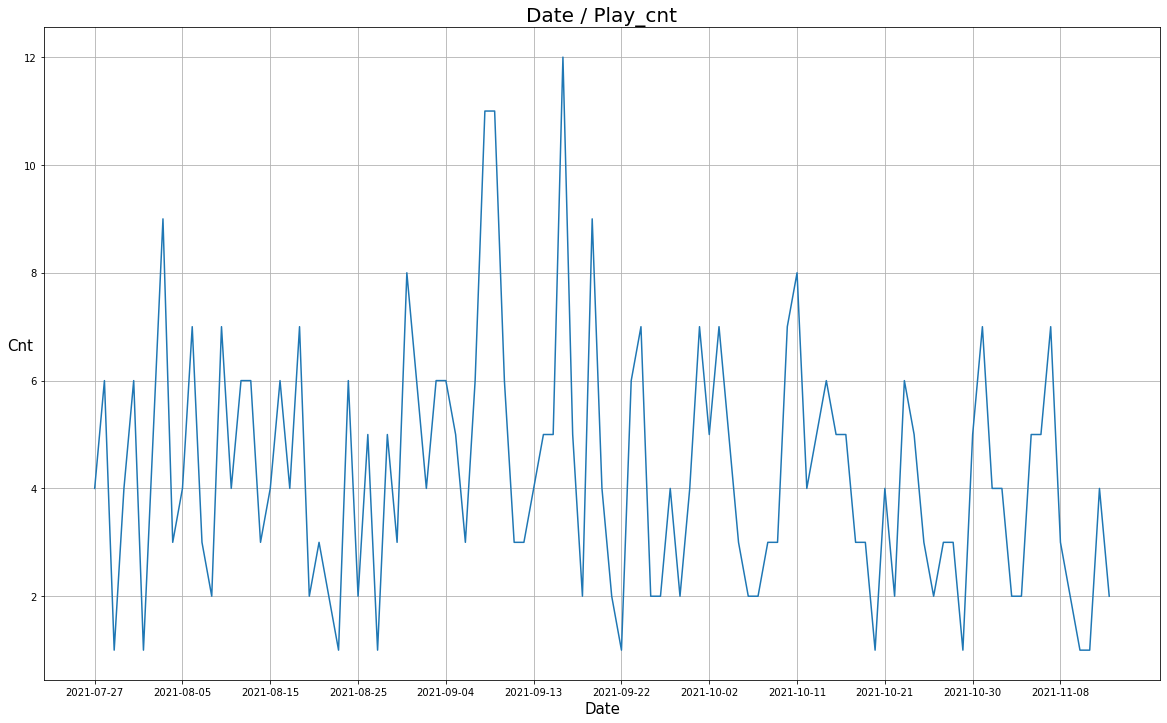

In [67]:
# 기간중 게임 횟수 / 7/27 ~ 11/14

plt.figure(figsize=(20,12))
plt.plot(date, cnt)
plt.title('Date / Play_cnt', fontsize= 20)
plt.xticks(ticks=date, rotation=0)
plt.locator_params(axis='x', nbins = 13)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Cnt', rotation = 0, fontsize = 15)
plt.grid()
plt.show

In [72]:
df.columns

Index(['game_num', 'play_date', 'game_type', 'result', 'game_length',
       'champion', 'spell_d', 'spell_f', 'level', 'creep_score', 'cs_1m',
       'kill', 'death', 'assist', 'kda', 'kill_ratio', 'average_tier',
       'op_score', 'damage_to_cham', 'total_damage', 'pink_ward', 'green_ward',
       'del_ward', 'total_kill', 'total_gold', 'get_baron', 'get_dragon',
       'get_tower', 'lose_baron', 'lose_dragon', 'lose_tower'],
      dtype='object')

In [73]:
df.result

0      승리
1      승리
2      패배
3      패배
4      승리
       ..
448    승리
449    패배
450    패배
451    패배
452    승리
Name: result, Length: 453, dtype: object

In [167]:
# a = df.groupby(['champion','result'])['game_num'].nunique()

In [170]:
a = df.groupby('champion')['result'].count()

In [171]:
b = pd.DataFrame(a).sort_values('result', ascending=False )
b = b.reset_index(drop = False)

In [172]:
most_cham = b.head(10)
most_cham

,champion,result
0,탐 켄치,55
1,벡스,42
2,라이즈,33
3,릴리아,31
4,이즈리얼,25
5,베인,23
6,아크샨,20
7,뽀삐,17
8,칼리스타,16
9,피오라,12


In [173]:
# 가장 플레이 많이 상위 10개 챔피언, 나머지는 그외 챔피언 플레이 횟수
most_cham.loc[10, :] = ['나머지', len(df) - most_cham.result.sum()]

<ipython-input-173-6388655f1059>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_cham.loc[10, :] = ['나머지', len(df) - most_cham.result.sum()]


In [176]:
most_cham

,champion,result
0,탐 켄치,55.0
1,벡스,42.0
2,라이즈,33.0
3,릴리아,31.0
4,이즈리얼,25.0
5,베인,23.0
6,아크샨,20.0
7,뽀삐,17.0
8,칼리스타,16.0
9,피오라,12.0


In [177]:
cham = list(most_cham['champion'])
cnt = list(most_cham['result'])

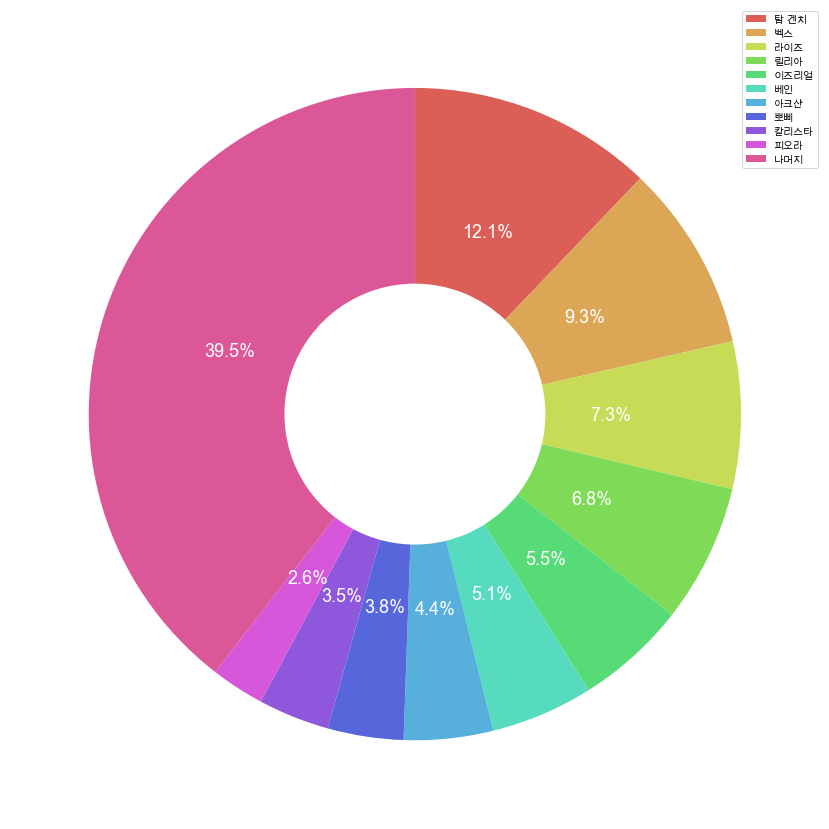

In [204]:
# 상위 10개의 챔피언 전체 게임 플레이 횟수의 약 60% 차지하는걸 확인
plt.figure(figsize=(25,15))
colors = sns.color_palette('hls',len(cham))
pie = plt.pie(cnt, ## 파이차트 출력
startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.1f}%'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.6), ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       colors = colors,
       textprops = {'size':18, 'color':'white'}
       )
 
plt.legend(pie[0],cham) ## 범례 표시
plt.show()

In [205]:
df.columns

Index(['game_num', 'play_date', 'game_type', 'result', 'game_length',
       'champion', 'spell_d', 'spell_f', 'level', 'creep_score', 'cs_1m',
       'kill', 'death', 'assist', 'kda', 'kill_ratio', 'average_tier',
       'op_score', 'damage_to_cham', 'total_damage', 'pink_ward', 'green_ward',
       'del_ward', 'total_kill', 'total_gold', 'get_baron', 'get_dragon',
       'get_tower', 'lose_baron', 'lose_dragon', 'lose_tower'],
      dtype='object')

AttributeError: module 'matplotlib.pyplot' has no attribute 'count'